First of all let's import all the libraries

In [65]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

# Load Dataset


In [66]:
df = pd.read_csv('/home/khangpt/MUSIC-GEN-PROJ/GTZAN/Data/features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


We should first see how big our dataset is

In [67]:
df.shape

(1000, 60)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

Let's check whther our dataset is balanced or not

In [69]:
df['label'].value_counts()

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

So our dataset is balanced dataset

#### Correlation Heatmap for feature means

# Data Preprocessing

Let's convert the **label** values into integers

In [70]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

**Independent and dependent variables**

In [71]:
X = df.drop(['label','length','filename'],axis=1)
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
print(label_mapping)
y = df['label'] 

{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


We are going to normalize our data

In [72]:
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

# Train-Test Split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 57), (300, 57), (700,), (300,))

# Build ML Models using Sklearn library

Below code is taken from this [link](https://www.kaggle.com/andradaolteanu/work-w-audio-data-visualise-classify-recommend)

In [74]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

We will going to make 11 models and then choose the best model

In [75]:

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")



Accuracy Neural Nets : 0.67 



/home/khangpt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


So we got highest accuracy with catboost model.Let's print the confusion matrix of it

Accuracy : 0.67 



/home/khangpt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<Axes: >

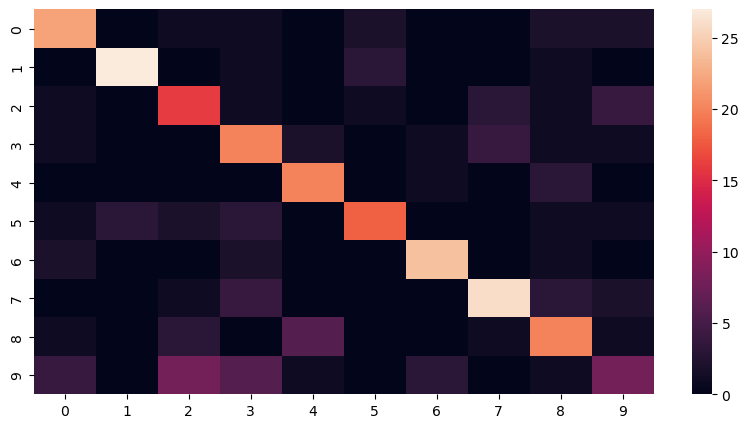

In [76]:
# Final model
cbc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
cbc.fit(X_train, y_train)


preds = cbc.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confus_mat = confusion_matrix(y_test, preds) 
plt.figure(figsize = (10, 5))
sns.heatmap(confus_mat)

# Deep Learning Model using tensorflow's keras

Now it's time to build our deep learning model,so let's go ahead

In [77]:
X_train.shape[1]

57

In [78]:
model = Sequential()

model.add(Flatten(input_shape=(57,)))
model.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer = keras.regularizers.l2(0.003)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/home/khangpt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 57)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │        29,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,882 (702.66 KB)

 Trainable params: 179,882 (702.66 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
# compile the model
adam = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
split_index = int(0.8 * len(X_train))  # Calculate split index based on ratio

X_train_new = X_train[:split_index]  # Features for training set (first 80%)
y_train_new = y_train[:split_index]  # Target variable for training set

X_val = X_train[split_index:]  # Features for validation set (last 20%)
y_val = y_train[split_index:]  # Target variable for validation set


Wuhhoo our model is ready let's train our model,let's run for 1000 epochs

In [80]:
hist = model.fit(X_train_new, y_train_new,
                 validation_data=(X_val, y_val),
                 epochs = 1000,
                 batch_size = 32)

Epoch 1/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0748 - loss: 4.4586 - val_accuracy: 0.1071 - val_loss: 4.3720
Epoch 2/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1291 - loss: 4.3688 - val_accuracy: 0.1214 - val_loss: 4.2946
Epoch 3/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1402 - loss: 4.2816 - val_accuracy: 0.1429 - val_loss: 4.2224
Epoch 4/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1280 - loss: 4.2219 - val_accuracy: 0.1857 - val_loss: 4.1542
Epoch 5/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1314 - loss: 4.1541 - val_accuracy: 0.2000 - val_loss: 4.0851
Epoch 6/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1855 - loss: 4.0739 - val_accuracy: 0.2429 - val_loss: 4.0138
Epoch 7/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1807 - loss: 4.0100 - val_accuracy: 0.2929 - val_loss: 3.9432
Epoch 8/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2283 - loss: 3.9457 - val_accuracy: 0

In [81]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6835 - loss: 1.2975 
Test accuracy: 0.6833333373069763


# Plot Accuracy and Loss

Max. Validation Accuracy 0.7214285731315613


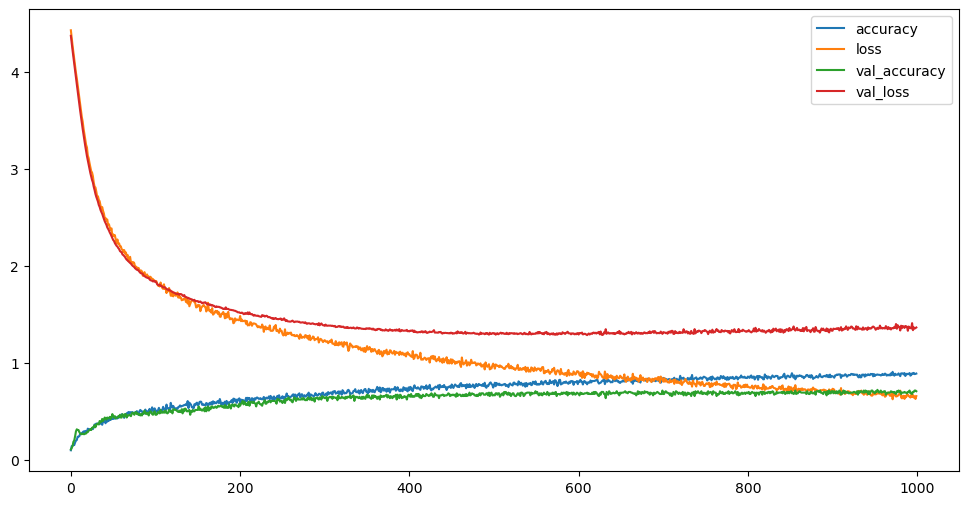

In [82]:
def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()
plotHistory(hist)

In [83]:
predictions = model.predict(X_test).argmax(axis=-1)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.2f%%' % (accuracy*100))
print(classification_report(y_test, predictions))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 68.33%
              precision    recall  f1-score   support

           0       0.61      0.63      0.62        30
           1       0.90      0.88      0.89        32
           2       0.60      0.67      0.63        27
           3       0.69      0.60      0.64        30
           4       0.66      0.79      0.72        24
           5       0.60      0.62      0.61        29
           6       0.81      0.76      0.79        29
           7       0.86      0.86      0.86        36
           8       0.63      0.59      0.61        32
           9       0.43      0.42      0.43        31

    accuracy                           0.68       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.69      0.68      0.68       300



In [91]:
print(model.predict(X[:15]).argmax(axis=-1))

# model.save("new_net.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[9 8 0 0 0 2 0 0 0 0 0 8 0 5 0]
